## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\sanju\OneDrive\Desktop\marketing dataset\smart_lock_dataset1.csv')
df.head()

,Unnamed: 0,Product Name,Price,Rating,Rating_count,Review_count
0,0,Atomberg SL 1 Smart Door Lock | 6 Ways Unlocki...,"16,189",4.3,112 ratings,"112 total ratings, 53 with reviews"
1,1,Atomberg Azhero Smart Door Lock | 6 Ways Unloc...,"10,899",5.0,2 ratings,"2 total ratings, 2 with reviews"
2,2,QUBO Smart Door Lock Essential from Hero Group...,"9,464",4.2,339 ratings,"339 total ratings, 268 with reviews"
3,3,QUBO Smart Door Lock Essential from Hero Group...,"8,937",4.4,727 ratings,"727 total ratings, 594 with reviews"
4,4,LAVNA Smart Fingerprint Padlock with 2 way acc...,"1,899",4.2,8 ratings,"8 total ratings, 6 with reviews"


## data cleaning

In [3]:
df.shape

(360, 6)

In [4]:
df['Ranking']= range(1, len(df) + 1)

In [5]:
df['Ratings_count']= df['Rating_count'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else '0')


In [6]:
df['Reviews_count']= df['Review_count'].apply(lambda x: x.split(',')[1].split(' ')[1] if isinstance(x, str) else '0')

In [7]:
df['Brand']= df['Product Name'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else np.nan)


In [8]:
df['SK_name'] = df['Product Name'].apply(lambda row: row.replace(row.split(' ')[0], '') if isinstance(row, str) else np.nan)
df

,Unnamed: 0,Product Name,Price,Rating,Rating_count,Review_count,Ranking,Ratings_count,Reviews_count,Brand,SK_name
0,0,Atomberg SL 1 Smart Door Lock | 6 Ways Unlocki...,"16,189",4.3,112 ratings,"112 total ratings, 53 with reviews",1,112,53,Atomberg,SL 1 Smart Door Lock | 6 Ways Unlocking | Fin...
1,1,Atomberg Azhero Smart Door Lock | 6 Ways Unloc...,"10,899",5.0,2 ratings,"2 total ratings, 2 with reviews",2,2,2,Atomberg,Azhero Smart Door Lock | 6 Ways Unlocking | F...
2,2,QUBO Smart Door Lock Essential from Hero Group...,"9,464",4.2,339 ratings,"339 total ratings, 268 with reviews",3,339,268,QUBO,Smart Door Lock Essential from Hero Group | 6...
3,3,QUBO Smart Door Lock Essential from Hero Group...,"8,937",4.4,727 ratings,"727 total ratings, 594 with reviews",4,727,594,QUBO,Smart Door Lock Essential from Hero Group | 6...
4,4,LAVNA Smart Fingerprint Padlock with 2 way acc...,"1,899",4.2,8 ratings,"8 total ratings, 6 with reviews",5,8,6,LAVNA,Smart Fingerprint Padlock with 2 way access F...
...,...,...,...,...,...,...,...,...,...,...,...
355,355,Yale YSS/250/EB1 20.5L Smart Safe Locker | Blu...,"25,499",2.9,8 ratings,"8 total ratings, 6 with reviews",356,8,6,Yale,YSS/250/EB1 20.5L Smart Safe Locker | Bluetoo...
356,356,Golens X59 Smart Door Lock with | Fingerprint ...,"12,499",4.2,71 ratings,"71 total ratings, 60 with reviews",357,71,60,Golens,X59 Smart Door Lock with | Fingerprint | Mobi...
357,357,Godrej Smart Lock I Catus Connect I Digital Lo...,"15,285",4.4,441 ratings,"441 total ratings, 291 with reviews",358,441,291,Godrej,Smart Lock I Catus Connect I Digital Lock for...
358,358,Yale YDM 7116 Smart Door Lock with Mortsie Loc...,"48,999",4.3,361 ratings,"361 total ratings, 52 with reviews",359,361,52,Yale,YDM 7116 Smart Door Lock with Mortsie Lock | ...


In [9]:
df_cleaned = df.dropna(subset=['Product Name'])

In [10]:
df_cleaned.isnull().sum()

Unnamed: 0         0
Product Name       0
Price              6
Rating           112
Rating_count     111
Review_count     134
Ranking            0
Ratings_count      0
Reviews_count      0
Brand              0
SK_name            0
dtype: int64

In [11]:
df_clean= df_cleaned.drop(columns=['Rating_count','Review_count','Unnamed: 0'])

In [12]:
df_clean['Rating']= df_clean['Rating'].replace(np.nan,0)
df_clean['Rating']

0      4.3
1      5.0
2      4.2
3      4.4
4      4.2
      ... 
355    2.9
356    4.2
357    4.4
358    4.3
359    4.5
Name: Rating, Length: 356, dtype: float64

In [13]:
df_clean.isnull().sum()

Product Name     0
Price            6
Rating           0
Ranking          0
Ratings_count    0
Reviews_count    0
Brand            0
SK_name          0
dtype: int64

In [14]:
df_clean

,Product Name,Price,Rating,Ranking,Ratings_count,Reviews_count,Brand,SK_name
0,Atomberg SL 1 Smart Door Lock | 6 Ways Unlocki...,"16,189",4.3,1,112,53,Atomberg,SL 1 Smart Door Lock | 6 Ways Unlocking | Fin...
1,Atomberg Azhero Smart Door Lock | 6 Ways Unloc...,"10,899",5.0,2,2,2,Atomberg,Azhero Smart Door Lock | 6 Ways Unlocking | F...
2,QUBO Smart Door Lock Essential from Hero Group...,"9,464",4.2,3,339,268,QUBO,Smart Door Lock Essential from Hero Group | 6...
3,QUBO Smart Door Lock Essential from Hero Group...,"8,937",4.4,4,727,594,QUBO,Smart Door Lock Essential from Hero Group | 6...
4,LAVNA Smart Fingerprint Padlock with 2 way acc...,"1,899",4.2,5,8,6,LAVNA,Smart Fingerprint Padlock with 2 way access F...
...,...,...,...,...,...,...,...,...
355,Yale YSS/250/EB1 20.5L Smart Safe Locker | Blu...,"25,499",2.9,356,8,6,Yale,YSS/250/EB1 20.5L Smart Safe Locker | Bluetoo...
356,Golens X59 Smart Door Lock with | Fingerprint ...,"12,499",4.2,357,71,60,Golens,X59 Smart Door Lock with | Fingerprint | Mobi...
357,Godrej Smart Lock I Catus Connect I Digital Lo...,"15,285",4.4,358,441,291,Godrej,Smart Lock I Catus Connect I Digital Lock for...
358,Yale YDM 7116 Smart Door Lock with Mortsie Loc...,"48,999",4.3,359,361,52,Yale,YDM 7116 Smart Door Lock with Mortsie Lock | ...


In [15]:
df_clean = df_clean.dropna(subset=['Price'])
df_clean

,Product Name,Price,Rating,Ranking,Ratings_count,Reviews_count,Brand,SK_name
0,Atomberg SL 1 Smart Door Lock | 6 Ways Unlocki...,"16,189",4.3,1,112,53,Atomberg,SL 1 Smart Door Lock | 6 Ways Unlocking | Fin...
1,Atomberg Azhero Smart Door Lock | 6 Ways Unloc...,"10,899",5.0,2,2,2,Atomberg,Azhero Smart Door Lock | 6 Ways Unlocking | F...
2,QUBO Smart Door Lock Essential from Hero Group...,"9,464",4.2,3,339,268,QUBO,Smart Door Lock Essential from Hero Group | 6...
3,QUBO Smart Door Lock Essential from Hero Group...,"8,937",4.4,4,727,594,QUBO,Smart Door Lock Essential from Hero Group | 6...
4,LAVNA Smart Fingerprint Padlock with 2 way acc...,"1,899",4.2,5,8,6,LAVNA,Smart Fingerprint Padlock with 2 way access F...
...,...,...,...,...,...,...,...,...
355,Yale YSS/250/EB1 20.5L Smart Safe Locker | Blu...,"25,499",2.9,356,8,6,Yale,YSS/250/EB1 20.5L Smart Safe Locker | Bluetoo...
356,Golens X59 Smart Door Lock with | Fingerprint ...,"12,499",4.2,357,71,60,Golens,X59 Smart Door Lock with | Fingerprint | Mobi...
357,Godrej Smart Lock I Catus Connect I Digital Lo...,"15,285",4.4,358,441,291,Godrej,Smart Lock I Catus Connect I Digital Lock for...
358,Yale YDM 7116 Smart Door Lock with Mortsie Loc...,"48,999",4.3,359,361,52,Yale,YDM 7116 Smart Door Lock with Mortsie Lock | ...


In [16]:
dup= df_clean.duplicated().any()

In [17]:
print("is there duplicates",dup)

is there duplicates False


In [18]:
data= df_clean

In [19]:
data

,Product Name,Price,Rating,Ranking,Ratings_count,Reviews_count,Brand,SK_name
0,Atomberg SL 1 Smart Door Lock | 6 Ways Unlocki...,"16,189",4.3,1,112,53,Atomberg,SL 1 Smart Door Lock | 6 Ways Unlocking | Fin...
1,Atomberg Azhero Smart Door Lock | 6 Ways Unloc...,"10,899",5.0,2,2,2,Atomberg,Azhero Smart Door Lock | 6 Ways Unlocking | F...
2,QUBO Smart Door Lock Essential from Hero Group...,"9,464",4.2,3,339,268,QUBO,Smart Door Lock Essential from Hero Group | 6...
3,QUBO Smart Door Lock Essential from Hero Group...,"8,937",4.4,4,727,594,QUBO,Smart Door Lock Essential from Hero Group | 6...
4,LAVNA Smart Fingerprint Padlock with 2 way acc...,"1,899",4.2,5,8,6,LAVNA,Smart Fingerprint Padlock with 2 way access F...
...,...,...,...,...,...,...,...,...
355,Yale YSS/250/EB1 20.5L Smart Safe Locker | Blu...,"25,499",2.9,356,8,6,Yale,YSS/250/EB1 20.5L Smart Safe Locker | Bluetoo...
356,Golens X59 Smart Door Lock with | Fingerprint ...,"12,499",4.2,357,71,60,Golens,X59 Smart Door Lock with | Fingerprint | Mobi...
357,Godrej Smart Lock I Catus Connect I Digital Lo...,"15,285",4.4,358,441,291,Godrej,Smart Lock I Catus Connect I Digital Lock for...
358,Yale YDM 7116 Smart Door Lock with Mortsie Loc...,"48,999",4.3,359,361,52,Yale,YDM 7116 Smart Door Lock with Mortsie Lock | ...


In [20]:
data['Ratings_count']= pd.to_numeric(data.Ratings_count, errors='coerce')
data['Reviews_count']= pd.to_numeric(data.Reviews_count, errors='coerce')


C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\3017336077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ratings_count']= pd.to_numeric(data.Ratings_count, errors='coerce')
C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\3017336077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reviews_count']= pd.to_numeric(data.Reviews_count, errors='coerce')


In [21]:
data.dtypes

Product Name      object
Price             object
Rating           float64
Ranking            int64
Ratings_count    float64
Reviews_count    float64
Brand             object
SK_name           object
dtype: object

### 1. Number of brands in the segment

In [22]:
data['Brand']= data['Brand'].str.lower()

C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\3636375731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Brand']= data['Brand'].str.lower()


In [23]:
 data['Brand'].unique()

array(['atomberg', 'qubo', 'lavna', 'godrej', 'okos', 'plantex', 'speedy',
       'uniy', 'yale', 'escozor', 'golens', 'valencia-', 'escozor®',
       'denler', 'helett', 'grob', 'ozone', 'ifitech', 'qawachh', 'mars',
       'delta', 'bonkaso', 'ironzon', 'nexmot', 'team', 'homemate',
       'foora', 'gordej', 'daonphari', 'equal', 'dorset', 'uniy®',
       'bioenable', 'code', 'jal', 'smart', 'bytbots', 'mx', 'triant',
       'dorphin', 'hawkvision', 'fingerprint', 'ezviz', 'putmax',
       'autens', 'tmezon', 'the', 'tuchware', 'codace', 'lockly',
       'drawer', 'leccy', 'houzmatic', 'inllex', 'fipilock', 'ghome',
       'jenix', 'amicismart', 'ezlife', 'zkteco', 'abez', 'securam',
       'geek', 'vizid', 'hafele', 'lockomatic', 'iplug', 'navkar',
       'excluzo', 'gunally', 'realtime', 'wallton', 'delavala', 'abez-',
       'folohaos', 'mukhivala', 'honexa', 'dhvaj', 'digital', 'premvati',
       'ketumal', 'ipsa', 'lacasa', 'jainson', 'olpad', 'iuknob',
       'pulido', 'bolt.cz

In [24]:
data['Brand']= data['Brand'].replace('the','quba')
data['Brand']= data['Brand'].replace('escozor®','escozor')
data['Brand']= data['Brand'].replace('uniy®','uniy')
data['Brand']= data['Brand'].replace('fingerprint','unknown')
data['Brand']= data['Brand'].replace('abez-','abez')
data['Brand']= data['Brand'].replace('Team','unknown')
data['Brand']= data['Brand'].replace('Jal','unknown')
data['Brand']= data['Brand'].replace('smart','unknown')
data['Brand']= data['Brand'].replace('drawer','unknown')
data['Brand']= data['Brand'].replace('digital','unknown')
data['Brand']= data['Brand'].replace('valencia-','valencia')

C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\3763048475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Brand']= data['Brand'].replace('the','quba')
C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\3763048475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Brand']= data['Brand'].replace('escozor®','escozor')
C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\3763048475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [25]:
data['Brand'].unique()

array(['atomberg', 'qubo', 'lavna', 'godrej', 'okos', 'plantex', 'speedy',
       'uniy', 'yale', 'escozor', 'golens', 'valencia-', 'denler',
       'helett', 'grob', 'ozone', 'ifitech', 'qawachh', 'mars', 'delta',
       'bonkaso', 'ironzon', 'nexmot', 'team', 'homemate', 'foora',
       'gordej', 'daonphari', 'equal', 'dorset', 'bioenable', 'code',
       'jal', 'unknown', 'bytbots', 'mx', 'triant', 'dorphin',
       'hawkvision', 'ezviz', 'putmax', 'autens', 'tmezon', 'quba',
       'tuchware', 'codace', 'lockly', 'leccy', 'houzmatic', 'inllex',
       'fipilock', 'ghome', 'jenix', 'amicismart', 'ezlife', 'zkteco',
       'abez', 'securam', 'geek', 'vizid', 'hafele', 'lockomatic',
       'iplug', 'navkar', 'excluzo', 'gunally', 'realtime', 'wallton',
       'delavala', 'folohaos', 'mukhivala', 'honexa', 'dhvaj', 'premvati',
       'ketumal', 'ipsa', 'lacasa', 'jainson', 'olpad', 'iuknob',
       'pulido', 'bolt.czar', 'ankh', 'losa', 'i-touch', 'rfid',
       'blusafe'], dtype=objec

In [26]:
data['Brand'].nunique()

87

Insights: There are 87 unique brands in the Smart Lock segment.

### 2. Count of SKUs per brand 

In [27]:
sku_count = data.groupby('Brand')['SK_name'].count().sort_values(ascending= False).head(20)
sku_count

Brand
golens        45
godrej        23
yale          22
escozor       19
ozone         19
unknown       18
dorset        16
lavna         16
denler        15
tuchware       9
qubo           8
okos           8
homemate       5
iplug          5
uniy           5
atomberg       5
vizid          4
excluzo        4
hawkvision     4
nexmot         4
Name: SK_name, dtype: int64

Text(0.5, 0, 'count of SKU name')

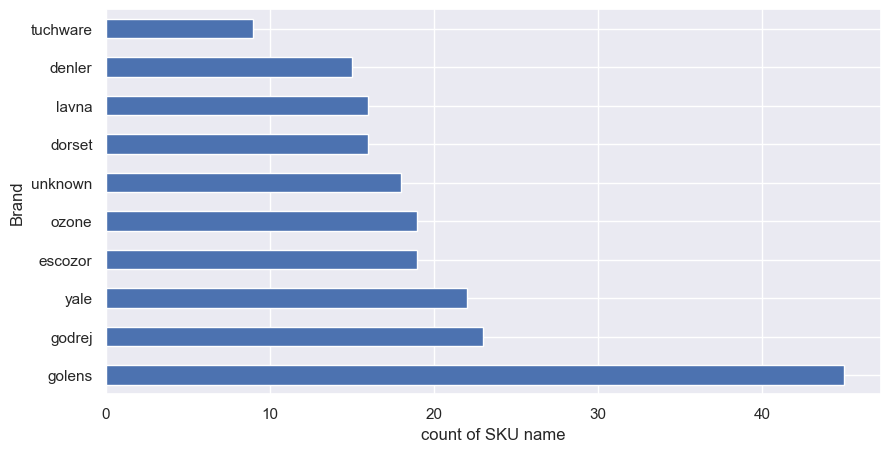

In [28]:
sk= sku_count.head(10)
sns.set(rc={'figure.figsize':(10,5)})
sk.plot(kind= 'barh')
plt.xlabel('count of SKU name')

Insights: Around 45 products of Golens Brand are there in the dataset which is the highest number. Godrej, Yale,
Escozor and ozone have 23, 22 and 19 products displayed in the website


### Relative ranking and relative rating:

In [39]:
# Calculating Relative Ranking for each Brand
relative_ranking = data.groupby('Brand').agg({'Ranking': 'mean'}).rename(columns={'Ranking': 'Relative Ranking'})

# Calculating Relative Rating for each Brand
relative_rating = data.groupby('Brand').agg({'Rating': 'mean'}).rename(columns={'Rating': 'Relative Rating'})

# Merging the results into one DataFrame
brand_analysis = relative_ranking.merge(relative_rating, on='Brand').reset_index().sort_values(by= ['Relative Ranking','Relative Rating'])

# Display the results
print("top 5 brands:\n",brand_analysis.head(5))
print("top 5 brands:\n",brand_analysis.tail(5))

top 5 brands:
         Brand  Relative Ranking  Relative Rating
65    plantex             15.00            0.000
3    atomberg             24.40            4.720
71       qubo             27.75            4.325
82  valencia-             28.00            4.200
75     speedy             37.00            4.700
top 5 brands:
       Brand  Relative Ranking  Relative Rating
2      ankh             342.0              0.0
56     losa             343.0              0.0
40  i-touch             346.0              0.0
73     rfid             348.0              0.0
6   blusafe             353.0              4.2


Insights:

Top 5 brands according to the relative ranking and relative rating are plantex, atomberg, qubo, valencia and speedy.
Bottom 5 brands according to the relative ranking and relative rating are pankh, i-touch, losa, rfid and blusafe.


### Price distribution of SKUs 

In [31]:
data.dtypes

Product Name      object
Price             object
Rating           float64
Ranking            int64
Ratings_count    float64
Reviews_count    float64
Brand             object
SK_name           object
dtype: object

In [32]:
data['Price'] = data['Price'].str.replace('[^\d.]', '', regex=True)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')


C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\2906225786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('[^\d.]', '', regex=True)
C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\2906225786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = pd.to_numeric(data['Price'], errors='coerce')


In [33]:
data['Price'].dtype

dtype('int64')

In [34]:
data['Price']

0      16189
1      10899
2       9464
3       8937
4       1899
       ...  
355    25499
356    12499
357    15285
358    48999
359    11945
Name: Price, Length: 350, dtype: int64

In [35]:
def categorize_price(price):
    if price <= 2999:
        return "<INR 2999"
    elif 3000 <= price <= 4999:
        return "INR 3000-4999"
    elif 5000 <= price <= 9999:
        return "INR 5000-9999"
    elif 10000 <= price <= 14999:
        return "INR 10000-14999"
    elif 15000 <= price <= 19999:
        return "INR 15000-19999"
    else:
        return ">INR 20000"

# Apply the function to categorize the price
data['Price Band'] = data['Price'].apply(categorize_price)

C:\Users\sanju\AppData\Local\Temp\ipykernel_26372\1899282802.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Band'] = data['Price'].apply(categorize_price)


In [36]:
price_count = data.groupby('Price Band')['SK_name'].count().sort_values(ascending= False)
price_count

Price Band
INR 5000-9999      89
INR 10000-14999    74
>INR 20000         69
<INR 2999          47
INR 15000-19999    44
INR 3000-4999      27
Name: SK_name, dtype: int64

<Axes: ylabel='Price Band'>

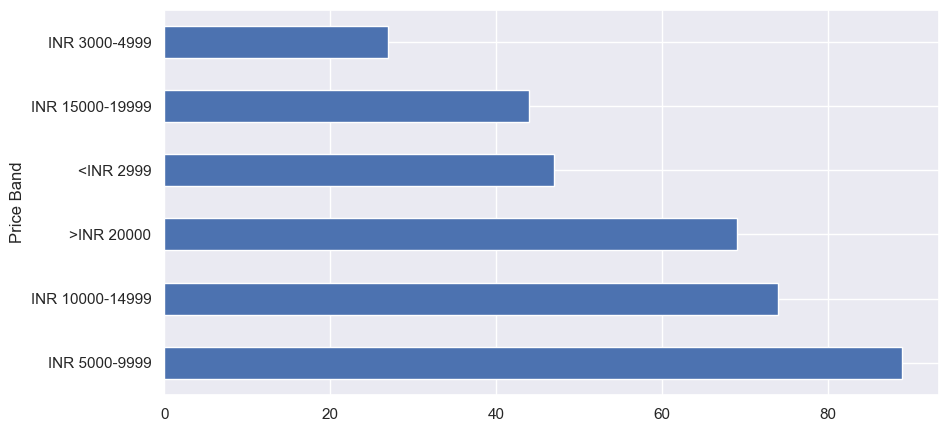

In [37]:
price_count.plot(kind= 'barh')

Insights:
Price of 89 products lies in range(Rs. 5000-9999), 74 products lies in range(Rs. 10000,14999) and 69 products have price greater than Rs. 20000.